<a href="https://colab.research.google.com/github/khwwang/coding-training/blob/master/230627_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 머신러닝

데이터에 숨겨진 정보와 규칙
기계가 스스로 습득 -> 예측하는 기술

> 정형데이터: 데이터베이스, csv 등

> 반정형데이터: xml, html 등

> 비정형데이터: 이미지, 동영상 등




좋은 모델: 데이터를 잘 예측(새로운 데이터를 잘 예측)

>과적합, 과소적합 -> 규제를 하거나 더 많은 데이터로 학습

>cross validation: k개로 분할하고 각분할한 것들을 validation으로 한번씩 검증하는 방식

>특성 스케일링
>minmax scaling -> 0과 1사이의 값으로 특성을 값들을 바꿔준다(값의 정도가 다르니까)
>표준화: 평균이 0 분산이 1인 값으로 바꿔준다.

>imbalanced data: oversampling or undersampling

>분류 알고리즘 판단

>confusion matrix

>Roc curve

>회귀 알고리즘 판단 -> error로

>R^2값 계산(error로 계산하기 때문에 작으면 좋은 것이다)

>knn: 가까운 이웃들로 분류하는 알고리즘-> k개수 정하기

# KNN

Orange와 grapefruit의 binary classificartion

In [7]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
citrus = pd.read_csv('citrus.csv')
citrus.shape

(10000, 6)

https://github.com/devdio/flyai_datasets

In [52]:
df = citrus.copy()
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [54]:
df.isna().sum(axis=0)

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

In [55]:
df.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


In [56]:
df['name'].value_counts()

orange        5000
grapefruit    5000
Name: name, dtype: int64

<Axes: xlabel='name', ylabel='count'>

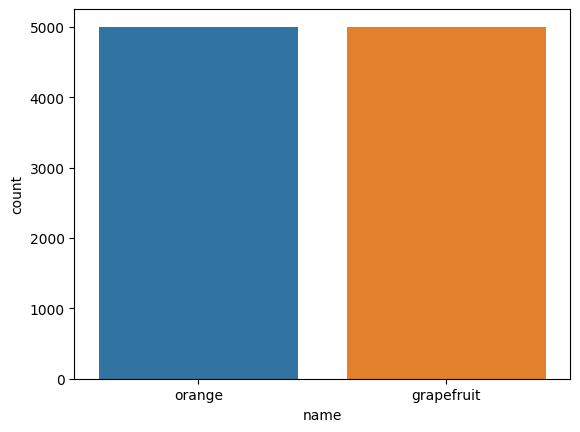

In [57]:
sns.countplot(data=df, x='name')

In [58]:
df.sample(frac=1)

,name,diameter,weight,red,green,blue
1611,orange,7.91,144.25,164,83,2
5677,grapefruit,10.11,175.84,135,69,23
2857,orange,8.71,156.09,155,83,2
4849,orange,10.88,187.57,150,77,2
9517,grapefruit,13.10,222.30,143,64,17
...,...,...,...,...,...,...
3369,orange,9.03,161.24,153,75,14
3872,orange,9.42,167.22,156,80,2
9351,grapefruit,12.88,218.87,144,70,12
595,orange,6.99,131.21,156,86,2


In [59]:
X = df.iloc[:,1:]
Y = df.iloc[:,:1]

In [60]:
X_train = X.iloc[:8000]
X_test = X.iloc[8000:]
Y_train = Y.iloc[:8000]
Y_test = Y.iloc[8000:]

In [61]:
u = X_train['diameter'].mean()
std = X_train['diameter'].std()

u_w = X_train['weight'].mean()
std_w = X_train['weight'].std()

u_r = X_train['red'].mean()
std_r = X_train['red'].std()

u_g = X_train['green'].mean()
std_g = X_train['green'].std()

u_b = X_train['blue'].mean()
std_b = X_train['blue'].std()

In [66]:
X_train['diameter']=(X_train['diameter'] - u)/std
X_train['weight']=(X_train['weight'] - u_w)/std_w
X_train['red']=(X_train['red'] - u_r)/std_r
X_train['green']=(X_train['green'] - u_g)/std_g
X_train['blue']=(X_train['blue'] - u_b)/std_b

X_test['diameter']=(X_test['diameter'] - u)/std
X_test['weight']=(X_test['weight'] - u_w)/std_w
X_test['red']=(X_test['red'] - u_r)/std_r
X_test['green']=(X_test['green'] - u_g)/std_g
X_test['blue']=(X_test['blue'] - u_b)/std_b

<ipython-input-66-aa229c10c26e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['diameter']=(X_train['diameter'] - u)/std
<ipython-input-66-aa229c10c26e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['weight']=(X_train['weight'] - u_w)/std_w
<ipython-input-66-aa229c10c26e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [64]:
Y_train = Y_train.replace({'grapefruit': 0, 'orange': 1})
Y_test = Y_test.replace({'grapefruit': 0, 'orange': 1})

In [74]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [75]:
y_pred= clf.predict(X_test)

<Axes: >

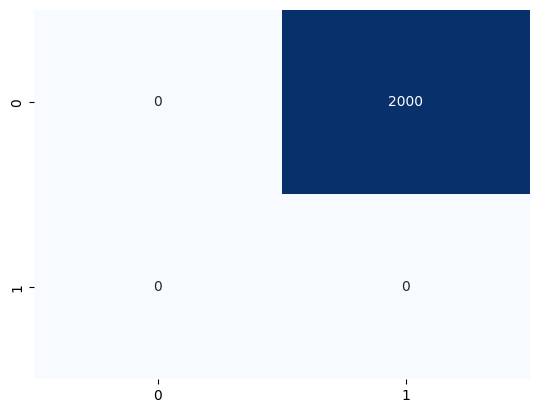

In [76]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)


In [72]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

acc = accuracy_score
re = recall_score
pr = precision_score
f1 = f1_score


In [73]:
score = []
for i in range(3,31):
  clf = KNeighborsClassifier(n_neighbors=i)
  clf.fit(X_train, Y_train)
  y_pred = clf.predict(X_test)
  acc = accuracy_score(Y_test,y_pred)
  score.append(acc)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

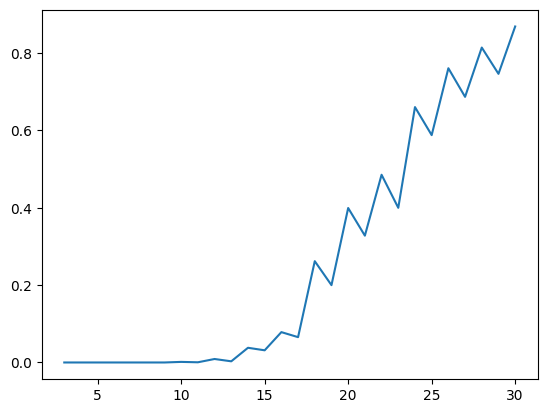

In [78]:
plt.plot(range(3,31), score)
plt.show()

# Gridsearch-model selection

In [82]:
from pandas.core import algorithms
from sklearn.model_selection import GridSearchCV
grid_params = {
    'n_neighbors':list(range(3,100)),
    'algorithm' : ['ball_tree', 'kd_tree', 'brute']
}
clf = KNeighborsClassifier()
grid = GridSearchCV(clf, grid_params, cv=5)
grid.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, 32, ...]})

In [83]:
grid.best_params_, grid.best_score_

({'algorithm': 'ball_tree', 'n_neighbors': 99}, 0.742)

In [94]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=99, algorithm='ball_tree')
clf.fit(X_train, Y_train)  # 데이터 학습
Y_pred = clf.predict(X_test)  # 데이터 예측

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [95]:
accuracy_score(Y_test, Y_pred)

1.0

# 다중분류

In [145]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [146]:
iris = pd.read_csv('diabetes.csv')

In [147]:
df = iris.copy()
df.shape

(768, 9)

In [148]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [149]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [150]:
df['Glucose'].replace(0, df['Glucose'].mean(), inplace=True)
df.min()

Pregnancies                  0.000
Glucose                     44.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

In [151]:
y  = df['Outcome']
X = df.iloc[:, :8]

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [153]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()  # MinMaxScaler 객체 생성
scaler.fit(X_train) # 데이터에 MinMax 스케일링 적용
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [154]:
from pandas.core import algorithms
from sklearn.model_selection import GridSearchCV
grid_params = {
    'n_neighbors':list(range(100)),
    'algorithm' : ['ball_tree', 'kd_tree', 'brute']
}
clf = KNeighborsClassifier()
grid = GridSearchCV(clf, grid_params, cv=5)
grid.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 213, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sk

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                         12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
                                         22, 23, 24, 25, 26, 27, 28, 29, ...]})

In [155]:
grid.best_params_, grid.best_score_

({'algorithm': 'ball_tree', 'n_neighbors': 13}, 0.7687325069972012)

In [156]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=13, algorithm='ball_tree')
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

In [157]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

acc = accuracy_score
re = recall_score
pr = precision_score
f1 = f1_score

print('accuracy_score : ', acc(y_test, y_pred))
print('recall_score : ', re(y_test, y_pred))
print('precision_score : ', pr(y_test, y_pred))
print('f1_score : ', f1(y_test, y_pred))

accuracy_score :  0.7272727272727273
recall_score :  0.5454545454545454
precision_score :  0.6382978723404256
f1_score :  0.5882352941176471


# iris

다중분류

In [159]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [160]:
iris = pd.read_csv('iris.csv')

In [161]:
df = iris.copy()
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [163]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [164]:
df.isna().sum(axis=0)

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [165]:
X = df.iloc[:,1:5]
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 표준화

In [166]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [168]:
# 데이터에 MinMax 스케일링 적용
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [170]:
clf = KNeighborsClassifier()
clf.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [173]:
y_pred = clf.predict(X_test_scaled)

In [180]:
acc = accuracy_score
re = recall_score
pr = precision_score
f1 = f1_score

print('accuracy_score : ', acc(y_test, y_pred))
# 다중분류는 뒤에 re, pr, f1뒤에 average='mecro'를 넣으면 된다

accuracy_score :  1.0


<Axes: >

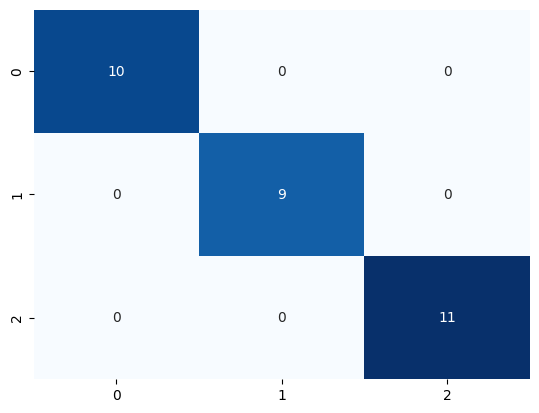

In [181]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)

# SVM

In [211]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [183]:
diabetes = pd.read_csv('diabetes.csv')

In [184]:
df = diabetes.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [188]:
df.shape

(768, 9)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [186]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [189]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [191]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [197]:
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] =  df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0,np.nan)

In [198]:
df.isna().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [202]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols:
  df.fillna(df[col].mean(),inplace=True)

In [203]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [207]:
X = df.iloc[:,:8]
y = df['Outcome']

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [209]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [210]:
# x와 y가 같은 numpy array형태로 만들어준다
y_train = y_train.values
y_test = y_test.values

In [212]:
svc = SVC(kernel='linear')
svc.fit(X_train_scaled, y_train)
y_pred = svc.predict(X_test_scaled)

In [213]:
acc = accuracy_score
re = recall_score
pr = precision_score
f1 = f1_score

print('accuracy_score : ', acc(y_test, y_pred))
print('recall_score : ', re(y_test, y_pred))
print('precision_score : ', pr(y_test, y_pred))
print('f1_score : ', f1(y_test, y_pred))

accuracy_score :  0.7662337662337663
recall_score :  0.6545454545454545
precision_score :  0.6792452830188679
f1_score :  0.6666666666666666


<Axes: >

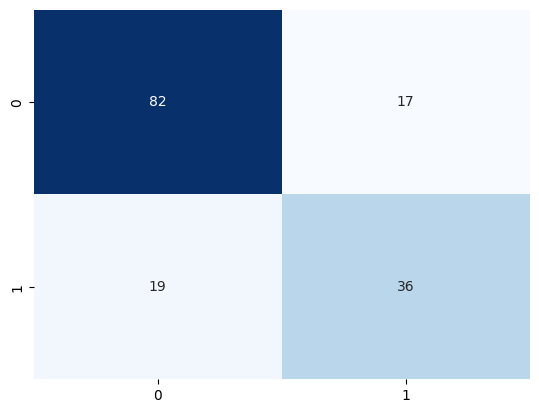

In [214]:
cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)

In [215]:
grid_params ={
    'C':list(range(1,10)),
    'kernel':['linear','ploy','rbf'],
    'gamma':[0.1, 0.5, 1.5,2.0]
}

In [216]:
grid = GridSearchCV(svc, grid_params, cv=5)
grid.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_pa

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'gamma': [0.1, 0.5, 1.5, 2.0],
                         'kernel': ['linear', 'ploy', 'rbf']})

In [217]:
grid.best_params_, grid.best_score_

({'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}, 0.7719845395175262)

In [218]:
svc = SVC(kernel='rbf', C=1,gamma=0.1)
svc.fit(X_train_scaled, y_train)
y_pred = svc.predict(X_test_scaled)

In [219]:
acc = accuracy_score
re = recall_score
pr = precision_score
f1 = f1_score

print('accuracy_score : ', acc(y_test, y_pred))
print('recall_score : ', re(y_test, y_pred))
print('precision_score : ', pr(y_test, y_pred))
print('f1_score : ', f1(y_test, y_pred))

accuracy_score :  0.7402597402597403
recall_score :  0.5636363636363636
precision_score :  0.6595744680851063
f1_score :  0.6078431372549019
